# Master1 - Empirical fMRI analyses, exploratory cohort

## Takuya Ito
#### 01/07/2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import multiprocessing as mp
import scipy.stats as stats
os.environ['OMP_NUM_THREADS'] = str(1)
import statsmodels.sandbox.stats.multicomp as mc
import sklearn
import seaborn as sns
plt.style.use("ggplot")
sns.set_style('whitegrid')
plt.rcParams["font.family"] = "FreeSans"
import nibabel as nib
import pandas as pd
import sys
sys.path.append('glmScripts/')
import taskGLMPipeline as tgp
import h5py
import dimensionality
sys.path.append('bctpy/')
import bct

## Set-up subject list and construct global variables

In [2]:
## Exploratory subjects
subjNums = ['178950','189450','199453','209228','220721','298455','356948','419239','499566','561444','618952','680452','757764','841349','908860',
            '103818','113922','121618','130619','137229','151829','158035','171633','179346','190031','200008','210112','221319','299154','361234',
            '424939','500222','570243','622236','687163','769064','845458','911849','104416','114217','122317','130720','137532','151930','159744',
            '172029','180230','191235','200614','211316','228434','300618','361941','432332','513130','571144','623844','692964','773257','857263',
            '926862','105014','114419','122822','130821','137633','152427','160123','172938','180432','192035','200917','211417','239944','303119',
            '365343','436239','513736','579665','638049','702133','774663','865363','930449','106521','114823','123521','130922','137936','152831',
            '160729','173334','180533','192136','201111','211619','249947','305830','366042','436845','516742','580650','645450','715041','782561',
            '871762','942658','106824','117021','123925','131823','138332','153025','162026','173536','180735','192439','201414','211821','251833',
            '310621','371843','445543','519950','580751','647858','720337','800941','871964','955465','107018','117122','125222','132017','138837',
            '153227','162329','173637','180937','193239','201818','211922','257542','314225','378857','454140','523032','585862','654350','725751',
            '803240','872562','959574','107422','117324','125424','133827','142828','153631','164030','173940','182739','194140','202719','212015',
            '257845','316633','381543','459453','525541','586460','654754','727553','812746','873968','966975']

## Validation subjects
#subjNums = ['100206','108020','117930','126325','133928','143224','153934','164636','174437','183034','194443','204521','212823','268749','322224',
#             '385450','463040','529953','587664','656253','731140','814548','877269','978578','100408','108222','118124','126426','134021','144832',
#             '154229','164939','175338','185139','194645','204622','213017','268850','329844','389357','467351','530635','588565','657659','737960',
#             '816653','878877','987074','101006','110007','118225','127933','134324','146331','154532','165638','175742','185341','195445','205119',
#             '213421','274542','341834','393247','479762','545345','597869','664757','742549','820745','887373','989987','102311','111009','118831',
#             '128632','135528','146432','154936','167036','176441','186141','196144','205725','213522','285345','342129','394956','480141','552241',
#             '598568','671855','744553','826454','896879','990366','102513','112516','118932','129028','135629','146533','156031','167440','176845',
#             '187850','196346','205826','214423','285446','348545','395756','481042','553344','599671','675661','749058','832651','899885','991267',
#             '102614','112920','119126','129129','135932','147636','157336','168745','177645','188145','198350','208226','214726','286347','349244',
#             '406432','486759','555651','604537','679568','749361','835657','901442','992774','103111','113316','120212','130013','136227','148133',
#             '157437','169545','178748','188549','198451','208327','217429','290136','352738','414229','497865','559457','615744','679770','753150',
#             '837560','907656','993675','103414','113619','120414','130114','136833','150726','157942','171330']

subjNums = ['178950','189450','199453','209228','220721','298455','356948','419239','499566','561444','618952','680452','757764','841349','908860',
            '103818','113922','121618','130619','137229','151829','158035','171633','179346','190031','200008','210112','221319','299154','361234',
            '424939','500222','570243','622236','687163','769064','845458','911849','104416','114217','122317','130720','137532','151930','159744',
            '172029','180230','191235','200614','211316','228434','300618','361941','432332','513130','571144','623844','692964','773257','857263',
            '926862','105014','114419','122822','130821','137633','152427','160123','172938','180432','192035','200917','211417','239944','303119',
            '365343','436239','513736','579665','638049','702133','774663','865363','930449','106521','114823','123521','130922','137936','152831',
            '160729','173334','180533','192136','201111','211619','249947','305830','366042','436845','516742','580650','645450','715041','782561',
            '871762','942658','106824','117021','123925','131823','138332','153025','162026','173536','180735','192439','201414','211821','251833',
            '310621','371843','445543','519950','580751','647858','720337','800941','871964','955465','107018','117122','125222','132017','138837',
            '153227','162329','173637','180937','193239','201818','211922','257542','314225','378857','454140','523032','585862','654350','725751',
            '803240','872562','959574','107422','117324','125424','133827','142828','153631','164030','173940','182739','194140','202719','212015',
            '257845','316633','381543','459453','525541','586460','654754','727553','812746','873968','966975','100206','108020','117930','126325','133928','143224','153934','164636','174437','183034','194443','204521','212823','268749','322224',
            '385450','463040','529953','587664','656253','731140','814548','877269','978578','100408','108222','118124','126426','134021','144832',
            '154229','164939','175338','185139','194645','204622','213017','268850','329844','389357','467351','530635','588565','657659','737960',
            '816653','878877','987074','101006','110007','118225','127933','134324','146331','154532','165638','175742','185341','195445','205119',
            '213421','274542','341834','393247','479762','545345','597869','664757','742549','820745','887373','989987','102311','111009','118831',
            '128632','135528','146432','154936','167036','176441','186141','196144','205725','213522','285345','342129','394956','480141','552241',
            '598568','671855','744553','826454','896879','990366','102513','112516','118932','129028','135629','146533','156031','167440','176845',
            '187850','196346','205826','214423','285446','348545','395756','481042','553344','599671','675661','749058','832651','899885','991267',
            '102614','112920','119126','129129','135932','147636','157336','168745','177645','188145','198350','208226','214726','286347','349244',
            '406432','486759','555651','604537','679568','749361','835657','901442','992774','103111','113316','120212','130013','136227','148133',
            '157437','169545','178748','188549','198451','208327','217429','290136','352738','414229','497865','559457','615744','679770','753150',
            '837560','907656','993675','103414','113619','120414','130114','136833','150726','157942','171330']


basedir = '/projects3/TaskFCMech/'

# Using final partition
networkdef = np.loadtxt('/projects3/NetworkDiversity/data/network_partition.txt')
networkorder = np.asarray(sorted(range(len(networkdef)), key=lambda k: networkdef[k]))
networkorder.shape = (len(networkorder),1)
# network mappings for final partition set
networkmappings = {'fpn':7, 'vis1':1, 'vis2':2, 'smn':3, 'aud':8, 'lan':6, 'dan':5, 'con':4, 'dmn':9, 
                   'pmulti':10, 'none1':11, 'none2':12}
networks = networkmappings.keys()

xticks = {}
reorderednetworkaffil = networkdef[networkorder]
for net in networks:
    netNum = networkmappings[net]
    netind = np.where(reorderednetworkaffil==netNum)[0]
    tick = np.max(netind)
    xticks[tick] = net

## General parameters/variables
nParcels = 360
nSubjs = len(subjNums)

glasserfile2 = '/projects/AnalysisTools/ParcelsGlasser2016/Q1-Q6_RelatedParcellation210.LR.CorticalAreas_dil_Colors.32k_fs_RL.dlabel.nii'
glasser2 = nib.load(glasserfile2).get_data()
glasser2 = np.squeeze(glasser2)

sortednets = np.sort(xticks.keys())
orderednetworks = []
for net in sortednets: orderednetworks.append(xticks[net])
    
networkpalette = ['royalblue','slateblue','paleturquoise','darkorchid','limegreen',
                  'lightseagreen','yellow','orchid','r','peru','orange','olivedrab']
networkpalette = np.asarray(networkpalette)

OrderedNetworks = ['VIS1','VIS2','SMN','CON','DAN','LAN','FPN','AUD','DMN','PMM','VMM','ORA']

tasks = {'EMOTION':[0,1],
     'GAMBLING':[2,3],
     'LANGUAGE':[4,5],
     'MOTOR':[6,7,8,9,10,11],
     'RELATIONAL':[12,13],
     'SOCIAL':[14,15],
     'WM':[16,17,18,19,20,21,22,23]}
taskNames = ['EMOTION', 'GAMBLING', 'LANGUAGE', 'MOTOR', 'RELATIONAL', 'SOCIAL', 'WM']
TRsPerRun = [176,176,253,253,316,316,284,284,232,232,274,274,405,405]
restRuns = ['rfMRI_REST1_RL', 'rfMRI_REST1_LR','rfMRI_REST2_RL', 'rfMRI_REST2_LR']
taskRuns= ['tfMRI_EMOTION_RL','tfMRI_EMOTION_LR','tfMRI_GAMBLING_RL','tfMRI_GAMBLING_LR',
           'tfMRI_LANGUAGE_RL','tfMRI_LANGUAGE_LR','tfMRI_MOTOR_RL','tfMRI_MOTOR_LR',
           'tfMRI_RELATIONAL_RL','tfMRI_RELATIONAL_LR','tfMRI_SOCIAL_RL','tfMRI_SOCIAL_LR','tfMRI_WM_RL','tfMRI_WM_LR']

# 0.0 Define functions for loading data

In [3]:
def loadRestResiduals(subj,model='24pXaCompCorXVolterra',zscore=False,FIR=False):
    datafile = '/projects3/TaskFCMech/data/hcppreprocessedmsmall/hcpPostProcCiric/' + subj + '_glmOutput_data.h5' 
    h5f = h5py.File(datafile,'r')
    data = []
    if FIR:
        dataid = 'rfMRI_REST_' + model + '_taskReg_resid_FIR'
        data = h5f['taskRegression'][dataid][:]
        if zscore:
            # Zscore each run separately
            runstart = 0
            for run in range(4):
                runend = runstart + 1195
                data[:,runstart:runend] = stats.zscore(data[:,runstart:runend],axis=1)
                runstart += 1195
                
            # Now z-score rest time series as if it were task
            trcount = 0
            for ntrs in TRsPerRun:
                trstart = trcount
                trend = trcount + ntrs
                data[:,trstart:trend] = stats.zscore(data[:,trstart:trend],axis=1)

                trcount += ntrs

        data = data.T
    else:
        for run in restRuns:
            dataid = run + '/nuisanceReg_resid_' + model
            tmp = h5f[dataid][:]
            tmp = stats.zscore(tmp,axis=1)
            data.extend(tmp.T)
    data = np.asarray(data).T
    h5f.close()
    return data

def loadTaskActivity(subj,model='24pXaCompCorXVolterra',zscore=False):
    datafile = '/projects3/TaskFCMech/data/hcppreprocessedmsmall/hcpPostProcCiric/' + subj + '_glmOutput_data.h5' 
    h5f = h5py.File(datafile,'r')
    betas = []
    for task in taskNames:
        dataid = 'tfMRI_' + task + '_' + model + '_taskReg_betas_canonical'
        tmp = h5f['taskRegression'][dataid][:]
        betas.extend(tmp[:,1:].T)
    betas = np.asarray(betas).T
    h5f.close()
    return betas

def loadTaskResiduals(subj, model='24pXaCompCorXVolterra', taskModel='FIR', zscore=False):
    datafile = '/projects3/TaskFCMech/data/hcppreprocessedmsmall/hcpPostProcCiric/' + subj + '_glmOutput_data.h5'         
    h5f = h5py.File(datafile,'r')
    resids = []
    for task in taskNames:
        dataid = 'tfMRI_' + task + '_' + model + '_taskReg_resid_' + taskModel
        tmp = h5f['taskRegression'][dataid][:]
        if zscore:
            nTRsPerRun = tmp.shape[1]/2
            tmp[:,:nTRsPerRun] = stats.zscore(tmp[:,:nTRsPerRun],axis=1)
            tmp[:,nTRsPerRun:] = stats.zscore(tmp[:,nTRsPerRun:],axis=1)
        resids.extend(tmp.T)
    resids = np.asarray(resids).T
    h5f.close()
    return resids

### Main parameters

In [4]:
model = '24pXaCompCorXVolterra'
zscore = False
FIR = True

# 1.0 Identify number of significantly active regions for each task, relative to 0

## 1.1 First load task activation data

In [5]:
nTasks = 24
taskActivity = np.zeros((nParcels,nTasks,len(subjNums)))
scount = 0
for subj in subjNums:
    taskActivity[:,:,scount] = loadTaskActivity(subj, model=model, zscore=zscore)
    scount += 1

## 1.2 Perform t-test against 0 for each task condition

In [6]:
taskActivity_stats = np.zeros((nParcels,nTasks,3)) # t-stat, p-value, q-value
for task in range(nTasks):
    ts, ps = stats.ttest_1samp(taskActivity[:,task,:],0,axis=1)
#     i = 0
#     for t in ts:
#         ps[i] = ps[i]/2.0 if t>0 else 1.0-ps[i]/2.0
#         i += 1
    
    q = mc.fdrcorrection0(ps)[0]
    taskActivity_stats[:,task,0] = ts
    taskActivity_stats[:,task,1] = ps
    taskActivity_stats[:,task,2] = q
    
    num_sig = np.sum(q==1)
    print 'Condition', task+1, 'has', num_sig, 'significantly active regions'
    
# Compute the average activity across all tasks across all brain regions
taskAvg = np.mean(np.mean(taskActivity,axis=0),axis=0)

t, p = stats.ttest_1samp(taskAvg, 0)
print 'Average whole-brain activity across all tasks'
print '\tt =', t, '| p =', p
print 'DoF:', len(subjNums)-1

Condition 1 has 270 significantly active regions
Condition 2 has 286 significantly active regions
Condition 3 has 336 significantly active regions
Condition 4 has 333 significantly active regions
Condition 5 has 312 significantly active regions
Condition 6 has 317 significantly active regions
Condition 7 has 331 significantly active regions
Condition 8 has 295 significantly active regions
Condition 9 has 297 significantly active regions
Condition 10 has 300 significantly active regions
Condition 11 has 274 significantly active regions
Condition 12 has 291 significantly active regions
Condition 13 has 335 significantly active regions
Condition 14 has 336 significantly active regions
Condition 15 has 320 significantly active regions
Condition 16 has 319 significantly active regions
Condition 17 has 295 significantly active regions
Condition 18 has 300 significantly active regions
Condition 19 has 317 significantly active regions
Condition 20 has 311 significantly active regions
Condition

## Compare connectivity of activated regions for task relative to rest, for each condition

## Load rest and task data time series

In [7]:
nTasks = 24
restTS = np.zeros((nParcels,4780,len(subjNums)))
restTS = np.zeros((nParcels,3810,len(subjNums)))
taskTS = np.zeros((nParcels,3810,len(subjNums)))
task_timing = np.zeros((3810,nTasks,len(subjNums)))
scount = 0
for subj in subjNums:
    if scount%25==0: print 'Loading in data for subject', scount+1, '/', len(subjNums)
    restTS[:,:,scount] = loadRestResiduals(subj,model=model,zscore=zscore,FIR=FIR)
    taskTS[:,:,scount] = loadTaskResiduals(subj, model=model, taskModel='FIR', zscore=zscore) # We make this FIR since we only want to use FIR regressed task residuals for FC analysis
    task_timing[:,:,scount] = tgp.loadTaskTimingForAllTasks(subj,taskModel='canonical')['taskRegressors']>.5 # Only to obtain which time points to estimate FC with
    scount += 1
    
task_timing = task_timing.astype(bool)


Loading in data for subject 1 / 352
Loading in data for subject 26 / 352
Loading in data for subject 51 / 352
Loading in data for subject 76 / 352
Loading in data for subject 101 / 352
Loading in data for subject 126 / 352
Loading in data for subject 151 / 352
Loading in data for subject 176 / 352
Loading in data for subject 201 / 352
Loading in data for subject 226 / 352
Loading in data for subject 251 / 352
Loading in data for subject 276 / 352
Loading in data for subject 301 / 352
Loading in data for subject 326 / 352
Loading in data for subject 351 / 352


## Compute task-general FC (across all task conditions versus rest FC)

In [8]:
taskGeneralFC = np.zeros((nParcels,nParcels,len(subjNums)))
restGeneralFC = np.zeros((nParcels,nParcels,len(subjNums)))
df_dimensionality = {}
df_dimensionality['State'] = []
df_dimensionality['Subject'] = []
df_dimensionality['Dimensionality'] = []

for s in range(len(subjNums)):
    taskGeneralTiming = np.sum(task_timing[:,:,s],axis=1)>0
#     taskGeneralTiming = task_timing[:,22,s]>0
    
    taskGeneralFC[:,:,s] = np.cov(taskTS[:,taskGeneralTiming,s])
#     np.fill_diagonal(taskGeneralFC[:,:,s],0)
    
    restGeneralFC[:,:,s] = np.cov(restTS[:,taskGeneralTiming,s])
#     np.fill_diagonal(restGeneralFC[:,:,s],0)
    
    df_dimensionality['State'].append('Task')
    df_dimensionality['Subject'].append(subjNums[s])
    tmp = np.cov(taskTS[:,taskGeneralTiming,s])
    df_dimensionality['Dimensionality'].append(dimensionality.getDimensionality(tmp))
    
    df_dimensionality['State'].append('Rest')
    df_dimensionality['Subject'].append(subjNums[s])
    tmp = np.cov(restTS[:,taskGeneralTiming,s])
    df_dimensionality['Dimensionality'].append(dimensionality.getDimensionality(tmp))
    

    
# Fz transform
# taskGeneralFC = np.arctanh(taskGeneralFC)
# restGeneralFC = np.arctanh(restGeneralFC)

groupStatsFC = np.zeros((nParcels,nParcels,3))
groupStatsFC[:,:,0], groupStatsFC[:,:,1] = stats.ttest_rel(taskGeneralFC,restGeneralFC,axis=2)

# FDR-correction
triu_ind = np.triu_indices(nParcels,k=1)
groupStatsFC[:,:,2][triu_ind] = mc.fdrcorrection0(groupStatsFC[:,:,1][triu_ind])[0]
groupStatsFC[:,:,2] = groupStatsFC[:,:,2] + groupStatsFC[:,:,2].T
np.fill_diagonal(groupStatsFC[:,:,1],1) # diagonal p-value should be

## Compute dimensionality for task FC and rest FC separately (for each subject)

Task versus rest, global dimensionality 	 Dim diff = 27.3138521208
	 t = 38.9568946644 | p = $p < 0.0001$


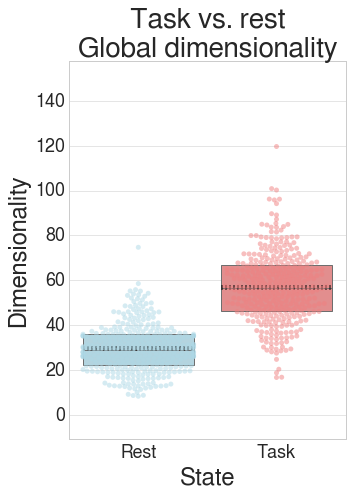

In [9]:
# df_dimensionality = {}
# df_dimensionality['State'] = []
# df_dimensionality['Subject'] = []
# df_dimensionality['Dimensionality'] = []
# scount = 0
# for subj in subjNums:
#     df_dimensionality['State'].append('Task')
#     df_dimensionality['Subject'].append(subj)
#     tmp = taskGeneralFC[:,:,scount].copy()
#     np.fill_diagonal(tmp,1)
#     df_dimensionality['Dimensionality'].append(dimensionality.getDimensionality(tmp))
    
#     df_dimensionality['State'].append('Rest')
#     df_dimensionality['Subject'].append(subj)
#     tmp = restGeneralFC[:,:,scount].copy()
#     np.fill_diagonal(tmp,1)
#     df_dimensionality['Dimensionality'].append(dimensionality.getDimensionality(tmp))
    
#     scount += 1
    
df_dimensionality = pd.DataFrame(df_dimensionality)

# Draw a nested boxplot to show bills by day and time
plt.figure(figsize=(5,7))
tmprest = df_dimensionality.loc[df_dimensionality['State']=='Rest']
tmptask = df_dimensionality.loc[df_dimensionality['State']=='Task']
t, p = stats.ttest_rel(tmptask['Dimensionality'],tmprest['Dimensionality'])

sns.boxplot(data=[tmprest['Dimensionality'],tmptask['Dimensionality']],
           palette=["#add8e6","#f08080"],
           meanline=True,showmeans=True,meanprops={'linewidth':5,'color':'k','linestyle':':'},
           medianprops={'linestyle':'-'},sym='',whis=0)
sns.swarmplot(data=[tmprest['Dimensionality'],tmptask['Dimensionality']],
            palette=["#add8e6","#f08080"],
            alpha=0.5)
if str(round(p,3))=="0.0": 
    p = '$p < 0.0001$'
else:
    p = '$p = ' + str(round(p,3))
plt.title('Task vs. rest\nGlobal dimensionality',fontsize=28,fontname='FreeSans')
# plt.title('Task versus Rest\nWhole-brain dimensionality\n$t_{175} = ' + str(round(t,3)) + '$ | ' + p,fontsize=24,fontname='FreeSans')
plt.ylabel('Dimensionality',fontsize=24)
plt.xlabel('State',fontsize=24)
plt.xticks(np.arange(2),['Rest','Task'],fontname='FreeSans',fontsize=18)
plt.ylim([np.min(df_dimensionality['Dimensionality'])-np.std(df_dimensionality['Dimensionality']),np.max(df_dimensionality['Dimensionality'])+2*np.std(df_dimensionality['Dimensionality'])]);
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('fMRI2_GlobalDimensionality_Exploratory.pdf')

print 'Task versus rest, global dimensionality',
print '\t Dim diff =', np.mean(tmptask['Dimensionality']) - np.mean(tmprest['Dimensionality'])
print '\t t =', t, '| p =', p


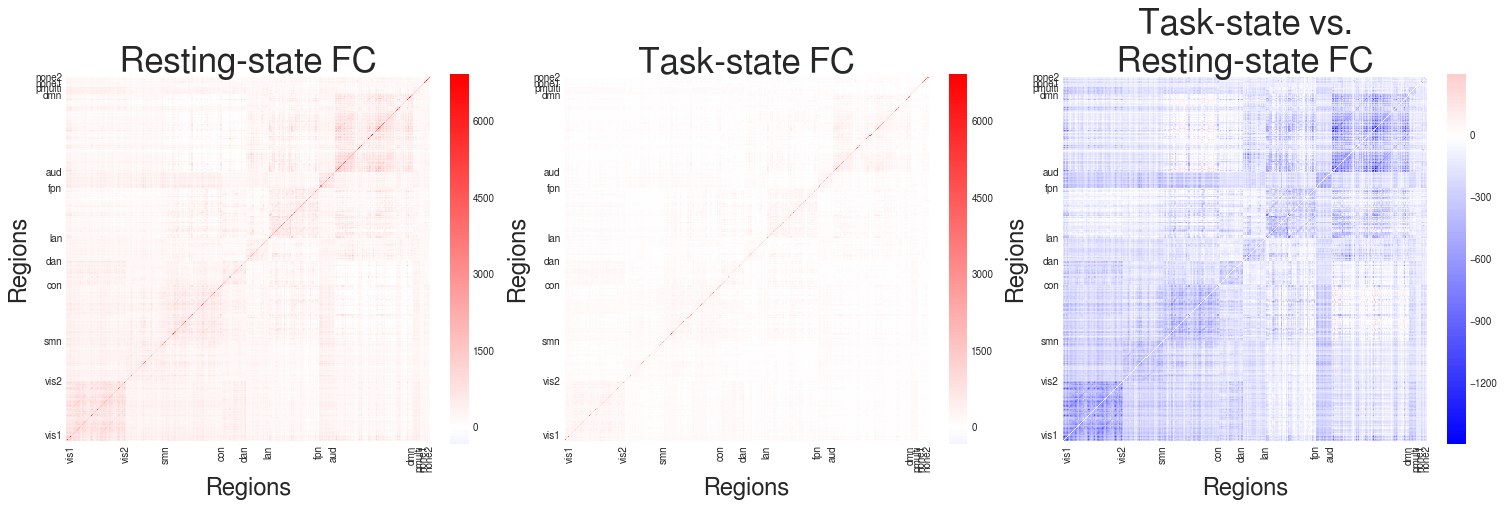

In [10]:
plt.figure(figsize=(21,7))

plt.subplot(131)
tmprest = np.mean(restGeneralFC,axis=2)
# sigFC = np.multiply(rest[:,:,0],groupStatsFC[:,:,2])
# ax = sns.heatmap(tmprest[networkorder,networkorder.T],square=True,center=0,cmap='bwr',vmin=-.1, vmax=.75, cbar=True,cbar_kws={'fraction':0.046})
ax = sns.heatmap(tmprest[networkorder,networkorder.T],square=True,center=0,cmap='bwr', vmin=np.min(tmprest), vmax=np.max(tmprest), cbar=True,cbar_kws={'fraction':0.046})
plt.xticks(xticks.keys(),xticks.values());
plt.yticks(xticks.keys(),xticks.values());
plt.xlabel('Regions',fontsize=24)
plt.ylabel('Regions',fontsize=24)
plt.title('Resting-state FC',fontsize=35)
ax.invert_yaxis()

plt.subplot(132)
tmptask = np.mean(taskGeneralFC,axis=2)
# sigFC = np.multiply(rest[:,:,0],groupStatsFC[:,:,2])
# ax = sns.heatmap(tmptask[networkorder,networkorder.T],square=True,center=0, vmin=-.1, vmax=.75, cmap='bwr',cbar=True,cbar_kws={'fraction':0.046})
ax = sns.heatmap(tmptask[networkorder,networkorder.T],square=True,center=0, cmap='bwr', vmin=np.min(tmprest), vmax=np.max(tmprest), cbar=True,cbar_kws={'fraction':0.046})
plt.xticks(xticks.keys(),xticks.values());
plt.yticks(xticks.keys(),xticks.values());
plt.xlabel('Regions',fontsize=24)
plt.ylabel('Regions',fontsize=24)
plt.title('Task-state FC',fontsize=35)
ax.invert_yaxis()
# print np.sum(sigFC)

plt.subplot(133)
# sigFC = np.multiply(groupStatsFC[:,:,0],groupStatsFC[:,:,2])
sigFC = np.multiply(tmptask-tmprest,groupStatsFC[:,:,2])
ax = sns.heatmap(sigFC[networkorder,networkorder.T],square=True,center=0,cmap='bwr', cbar=True,cbar_kws={'fraction':0.046})
plt.xticks(xticks.keys(),xticks.values());
plt.yticks(xticks.keys(),xticks.values());
plt.xlabel('Regions',fontsize=24)
plt.ylabel('Regions',fontsize=24)
plt.title('Task-state vs.\nResting-state FC',fontsize=35)
ax.invert_yaxis()
plt.tight_layout()
# plt.savefig('fMRI2_TaskRestFC_Exploratory.pdf')



	Number of FC Increases: 1.31073970907
	Number of FC Decreases: 96.7718972454


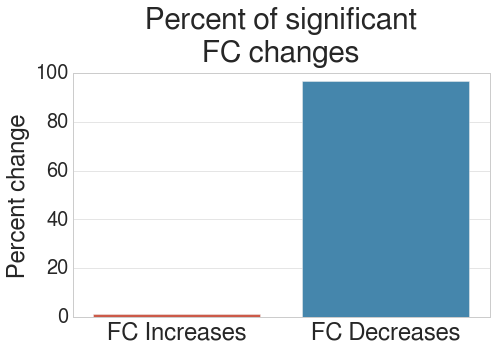

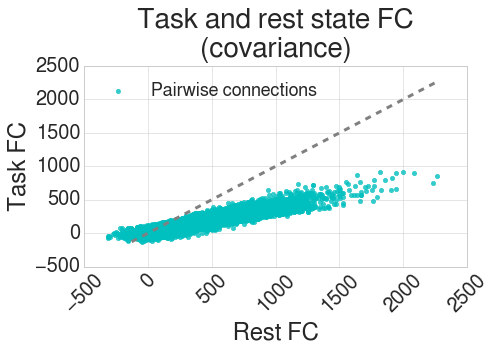

In [30]:
totalConn = (nParcels*nParcels)-nParcels
posFC = np.sum(np.multiply(groupStatsFC[:,:,0]>0,groupStatsFC[:,:,2]))/totalConn*100
negFC = np.sum(np.multiply(groupStatsFC[:,:,0]<0,groupStatsFC[:,:,2]))/totalConn*100

print '\tNumber of FC Increases:', posFC
print '\tNumber of FC Decreases:', negFC
# print '\tPos-Neg Ratio =', posFC/negFC

plt.figure(figsize=(7,5))
sns.barplot(x=np.arange(2),y=[posFC,negFC])
plt.xticks(np.arange(2),['FC Increases', 'FC Decreases'],fontsize=24)
plt.ylabel('Percent change',fontsize=24)
plt.yticks(fontsize=20)
plt.title('Percent of significant\nFC changes', y=1.03,fontsize=30)
plt.tight_layout()
# plt.savefig('fMRI2_NumberFCChanges_Exploratory.pdf')


## Reviewer request - scatter plot of connection-wise FC changes
triu_ind = np.triu_indices(nParcels,k=1)
plt.figure(figsize=(7,5))
df = {}
df['Rest FC'] = []
df['Task FC'] = []
df['Rest FC'].extend(np.mean(restGeneralFC,axis=2)[triu_ind])
df['Task FC'].extend(np.mean(taskGeneralFC,axis=2)[triu_ind])
df = pd.DataFrame(data=df)
sns.regplot(x="Rest FC",y="Task FC",data=df,fit_reg=False,label='Pairwise connections',color='c')
minfc = np.min(np.mean(taskGeneralFC,axis=2)[triu_ind])
maxfc = np.max(np.mean(restGeneralFC,axis=2)[triu_ind])
plt.plot(np.arange(minfc,maxfc,1),np.arange(minfc,maxfc,1),color='grey',linestyle='--',linewidth=3)
plt.title('Task and rest state FC\n(covariance)',fontsize=28, y=1.02)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('Task FC', fontsize=24)
plt.xlabel('Rest FC', fontsize=24)
plt.legend(loc=2, prop={'size': 18})
plt.tight_layout()
plt.savefig('fMRI2_TaskRestFC_Change_Scatter.jpg',dpi=300)




Rank Correlation between co-activation map and FC difference map
	Rho = -0.0621331750095
	p = 2.67533226468e-56


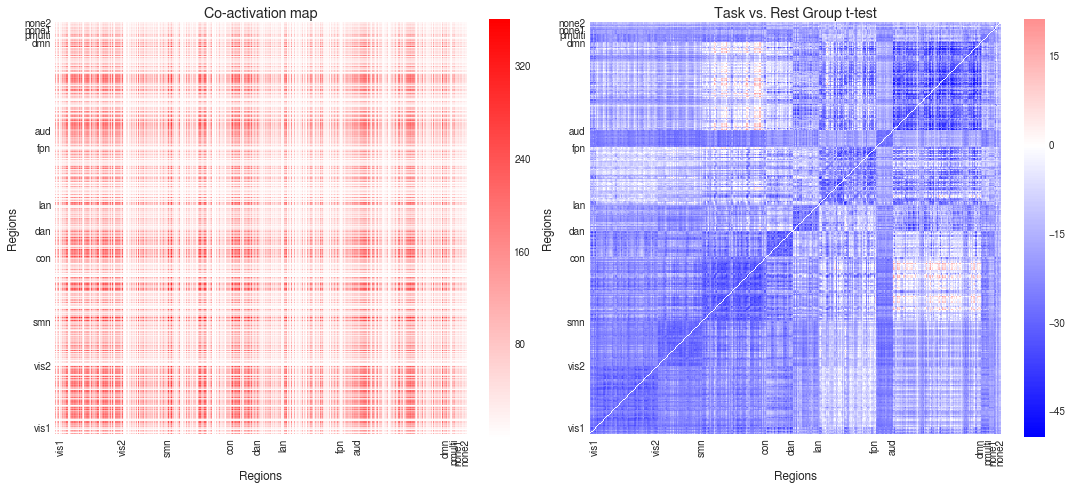

In [19]:
plt.figure(figsize=(15,7))
plt.subplot(121)
activity = np.mean(taskActivity,axis=1)
t, p = stats.ttest_1samp(activity,0,axis=1)
qs = mc.fdrcorrection0(p)[0]
tsig = np.multiply(t,qs)
tsig = t
tsig.shape = (len(tsig),1)
# tsig = np.corrcoef(tsig)
tsig = np.dot(tsig,tsig.T)/np.std(tsig)**2

activity = stats.ttest_1samp(taskActivity,0,axis=2)[0]
coactivation = np.abs(np.mean(activity,axis=1))
coactivation.shape = (len(coactivation),1)
coactivation = np.dot(coactivation,coactivation.T)
tsig = coactivation

ax = sns.heatmap(tsig[networkorder,networkorder.T],square=True,center=0,cmap='bwr',cbar_kws={'fraction':0.046})
plt.title('Significantly active regions\nCross-task average')
plt.ylabel('Regions')
ax.invert_yaxis()
plt.title('Co-activation map')
plt.xticks(xticks.keys(),xticks.values());
plt.yticks(xticks.keys(),xticks.values());
plt.xlabel('Regions')
plt.ylabel('Regions')

plt.subplot(122)
sigFC = np.multiply(groupStatsFC[:,:,0],groupStatsFC[:,:,2])
ax = sns.heatmap(sigFC[networkorder,networkorder.T],square=True,center=0,cmap='bwr',cbar_kws={'fraction':0.046})
plt.xticks(xticks.keys(),xticks.values());
plt.yticks(xticks.keys(),xticks.values());
plt.xlabel('Regions')
plt.ylabel('Regions')
plt.title('Task vs. Rest Group t-test')
ax.invert_yaxis()
plt.tight_layout()

# Now correlate co-activation map with task-v rest map
activity = stats.ttest_1samp(taskActivity,0,axis=2)[0]
coactivation = np.abs(np.mean(activity,axis=1))
coactivation.shape = (len(coactivation),1)
coactivation = np.dot(coactivation,coactivation.T)
# coactivation = np.corrcoef(coactivation)
# t, p = stats.ttest_1samp(activity,0,axis=1)
triu_ind = np.triu_indices(nParcels,k=1)
r, p = stats.spearmanr(coactivation[triu_ind],groupStatsFC[:,:,0][triu_ind])
print 'Rank Correlation between co-activation map and FC difference map'
print '\tRho =', r
print '\tp =', p


In [20]:
nproc = 20
# taskRestFCDiff = np.zeros((nParcels,len(tasks),3)) # t-stat, p-value, q-value
# taskFC = np.zeros((nParcels,nParcels,len(tasks),len(subjNums))) # From task time series using FIR regressed data
# restFC = np.zeros((nParcels,nParcels,len(tasks),len(subjNums))) # From rest time series, but using FIR regressed rest timings
# FC_change_stats = np.zeros((nParcels,nParcels,len(tasks),3)) # p and q values

# taskSD = np.zeros((nParcels,len(tasks),len(subjNums))) # From task time series using FIR regressed data
# restSD = np.zeros((nParcels,len(tasks),len(subjNums))) # From rest time series, but using FIR regressed rest timings

# nCond = 24

taskRestFCDiff = np.zeros((nParcels,len(tasks),3)) # t-stat, p-value, q-value
taskFC = np.zeros((nParcels,nParcels,len(tasks),len(subjNums))) # From task time series using FIR regressed data
restFC = np.zeros((nParcels,nParcels,len(tasks),len(subjNums))) # From rest time series, but using FIR regressed rest timings
FC_change_stats = np.zeros((nParcels,nParcels,len(tasks),3)) # p and q values

taskSD = np.zeros((nParcels,len(tasks),len(subjNums))) # From task time series using FIR regressed data
restSD = np.zeros((nParcels,len(tasks),len(subjNums))) # From rest time series, but using FIR regressed rest timings

def computeFC(data):
    fc = np.cov(data)
    np.fill_diagonal(fc,0)
    #fc = np.arctanh(fc)
    return fc

task = 0
for t in taskNames:
    task_ind = tasks[t]
    
    inputsRest = []
    inputsTask = []
    scount = 0
    for subj in subjNums:
        tasktime = np.sum(task_timing[:,task_ind,scount],axis=1)>0 # isolate task
#         tasktime = task_timing[:,task,scount] # isolate task
        
        
#         taskSD[:,task,scount] = np.std(taskTS[:,tasktime,scount],axis=1)
#         restSD[:,task,scount] = np.std(restTS[:,tasktime,scount],axis=1)
#         taskmean = np.mean(taskTS[:,tasktime,scount],axis=1)
#         taskmean.shape = (len(taskmean),1)
#         restmean = np.mean(restTS[:,tasktime,scount],axis=1)
#         restmean.shape = (len(restmean),1)
#         taskSD[:,task,scount] = np.mean((taskTS[:,tasktime,scount]-taskmean)**2,axis=1)
#         restSD[:,task,scount] = np.mean((restTS[:,tasktime,scount]-restmean)**2,axis=1)
        
        taskSD[:,task,scount] = np.var(taskTS[:,tasktime,scount],axis=1)
        restSD[:,task,scount] = np.var(restTS[:,tasktime,scount],axis=1)
        # Fano factor
#         taskSD[:,task,scount] = np.divide(np.std(taskTS[:,tasktime,scount],axis=1)**2,np.mean(taskActivity[:,task_ind,scount],axis=1))
#         restSD[:,task,scount] = np.divide(np.std(restTS[:,tasktime,scount],axis=1)**2,np.mean(taskActivity[:,task_ind,scount],axis=1))
        
        inputsRest.append(restTS[:,tasktime,scount])
        inputsTask.append(taskTS[:,tasktime,scount])
        
        scount += 1
        
    pool = mp.Pool(processes=nproc)
    resultsRest = pool.map_async(computeFC,inputsRest).get()
    pool.close()
    pool.join()
    
    pool = mp.Pool(processes=nproc)
    resultsTask = pool.map_async(computeFC,inputsTask).get()
    pool.close()
    pool.join()
    
    for s in range(len(subjNums)):
        restFC[:,:,task,s] = resultsRest[s]
        taskFC[:,:,task,s] = resultsTask[s]
    
    t, p = stats.ttest_rel(taskFC[:,:,task,:], restFC[:,:,task,:],axis=2)
#     FC_change_stats[:,:,task,0] = np.tanh(np.mean(taskFC[:,:,task,:] - restFC[:,:,task,:],axis=2))
    FC_change_stats[:,:,task,0] = np.mean(taskFC[:,:,task,:] - restFC[:,:,task,:],axis=2)
    FC_change_stats[:,:,task,1] = p
#     np.fill_diagonal(FC_change_stats[:,:,task,1],1.0) # diagonal should have p=1.0
    
    # Perform FDR-correction on changed connections
    triu_ind = np.triu_indices(nParcels,k=1)
    FC_change_stats[:,:,task,2][triu_ind] = mc.fdrcorrection0(FC_change_stats[:,:,task,1][triu_ind])[0]
    FC_change_stats[:,:,task,2] = FC_change_stats[:,:,task,2] + FC_change_stats[:,:,task,2].T
#     np.fill_diagonal(FC_change_stats[:,:,task,2],0) # Diagonal should have q=1.0
    
    task += 1
        

/usr/local/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# 1.0 *Hypothesis*: From rest to task states, there will be more quenching of correlated variability (and overall variability)

#### Group-averaged analysis (using average difference across tasks)

Average correlation difference between task versus rest: -192.960514111
Task vs. Rest average FC difference: t = -27.2998597351 | p = 8.07634581276e-89
Average SD difference between task versus rest: -877.053141995
Task vs. Rest average SD difference: t = -60.5036977904 | p = 9.24796569676e-188


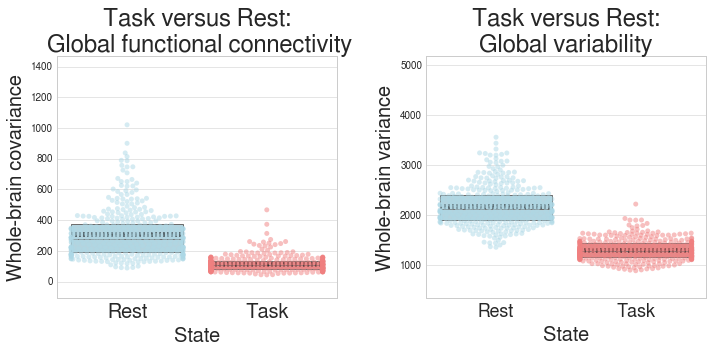

In [21]:
# Perform a Group-level analysis; average across all tasks
taskfc_avg = np.mean(np.mean(np.mean(taskFC,axis=2),axis=1),axis=0) # Compute average correlation for each subject
restfc_avg = np.mean(np.mean(np.mean(restFC,axis=2),axis=1),axis=0)
fcstats = np.zeros((3,)) # avg r, t, p
fcstats[0] = np.mean(taskfc_avg-restfc_avg)
fcstats[1],fcstats[2] = stats.ttest_rel(taskfc_avg,restfc_avg)
print 'Average correlation difference between task versus rest:', fcstats[0]
print 'Task vs. Rest average FC difference: t =', fcstats[1], '| p =', fcstats[2]

taskSD_avg = np.mean(np.mean(taskSD,axis=1),axis=0)
restSD_avg = np.mean(np.mean(restSD,axis=1),axis=0)
# taskSD_avg = np.mean(taskSD,axis=0)
# restSD_avg = np.mean(restSD,axis=0)
sdstats = np.zeros((3,))
sdstats[0] = np.mean(taskSD_avg-restSD_avg)
sdstats[1],sdstats[2] = stats.ttest_rel(taskSD_avg,restSD_avg)
print 'Average SD difference between task versus rest:', sdstats[0]
print 'Task vs. Rest average SD difference: t =', sdstats[1], '| p =', sdstats[2]

## Plot
df_stat = {}
df_stat['Subject'] = []
df_stat['FC'] = []
df_stat['SD'] = []
df_stat['State'] = []

# For rest state
df_stat['State'].extend(np.repeat('Rest',len(subjNums)))
df_stat['Subject'].extend(subjNums)
df_stat['FC'].extend(restfc_avg)
df_stat['SD'].extend(restSD_avg)
# For task state
df_stat['State'].extend(np.repeat('Task',len(subjNums)))
df_stat['Subject'].extend(subjNums)
df_stat['FC'].extend(taskfc_avg)
df_stat['SD'].extend(taskSD_avg)


df_stat = pd.DataFrame(df_stat)

# Draw a nested boxplot to show bills by day and time
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Task versus Rest:\n Global functional connectivity',fontname='FreeSans',fontsize=24)
sns.boxplot(x="State",y="FC",data=df_stat,
           palette=["#add8e6","#f08080"],
           meanline=True,showmeans=True,meanprops={'linewidth':5,'color':'k','linestyle':':'},
           medianprops={'linestyle':'-'},sym='',whis=0)
sns.swarmplot(x="State",y="FC",
            palette=["#add8e6","#f08080"],
            data=df_stat,alpha=0.5)
plt.ylabel('Whole-brain covariance',fontsize=20, fontname='FreeSans')
plt.xlabel('State', fontsize=20,fontname='FreeSans')
plt.ylim([np.min(df_stat['FC'])-np.std(df_stat['FC']),np.max(df_stat['FC'])+3*np.std(df_stat['FC'])]);
plt.xticks(fontsize=20,fontname='FreeSans')

plt.subplot(122)
plt.title('Task versus Rest:\nGlobal variability',fontname='FreeSans',fontsize=24)
sns.boxplot(x="State",y="SD",data=df_stat,
           palette=["#add8e6","#f08080"],
           meanline=True,showmeans=True,meanprops={'linewidth':5,'color':'k','linestyle':':'},
           medianprops={'linestyle':'-'},sym='',whis=0)
sns.swarmplot(x="State",y="SD",
            palette=["#add8e6","#f08080"],
            data=df_stat,alpha=0.5)
plt.ylabel('Whole-brain variance',fontsize=20, fontname='FreeSans')
plt.xlabel('State', fontsize=20,fontname='FreeSans')
plt.xticks(fontsize=18,fontname='FreeSans')
plt.ylim([np.min(df_stat['SD'])-np.std(df_stat['SD']),np.max(df_stat['SD'])+3*np.std(df_stat['SD'])]);
plt.tight_layout()
# plt.savefig('fMRI2_WholeBrainFCandSD_TaskVRest_Exploratory.pdf')

## Compute the GBC and variability of each region during task versus rest, and visualize on the surface

In [22]:
fcByROI = np.zeros((glasser2.shape[0],4)) # fc diff, t, p, q
sdByROI = np.zeros((glasser2.shape[0],4)) # sd diff, t, p, q
actByROI = np.zeros((glasser2.shape[0],4)) # act diff, t, p, q
fcdiff = taskFC - restFC
sddiff = taskSD - restSD

ps_fc = []
ps_sd = []
ps_act = []

for roi in range(nParcels):
    roi_ind = np.where(glasser2==roi+1)[0]

    tmp = np.mean(np.mean(fcdiff[roi,:,:,:],axis=1),axis=1)
    t, p = stats.ttest_1samp(tmp,0)
    fcByROI[roi_ind,0] = np.mean(tmp)
    fcByROI[roi_ind,1] = t
    fcByROI[roi_ind,2] = p
    ps_fc.append(p)
    
    tmp = np.mean(sddiff[roi,:,:],axis=0)
    t, p = stats.ttest_1samp(tmp,0)
    sdByROI[roi_ind,0] = np.mean(tmp)
    sdByROI[roi_ind,1] = t
    sdByROI[roi_ind,2] = p
    ps_sd.append(p)
    
    tmp = np.mean(taskActivity[roi,:,:],axis=0)
    t, p = stats.ttest_1samp(tmp,0)
    actByROI[roi_ind,0] = np.mean(tmp)
    actByROI[roi_ind,1] = t
    actByROI[roi_ind,2] = p
    ps_act.append(p)
    
qs_fc = mc.fdrcorrection0(ps_fc)[1]
qs_sd = mc.fdrcorrection0(ps_sd)[1]
qs_act = mc.fdrcorrection0(ps_act)[1]

for roi in range(nParcels):
    roi_ind = np.where(glasser2==roi+1)[0]
    
    fcByROI[roi_ind,3] = qs_fc[roi]
    tmp = qs_fc[roi] < 0.05
    fcByROI[roi_ind,0] = np.multiply(fcByROI[roi_ind,0],tmp)
    fcByROI[roi_ind,1] = np.multiply(fcByROI[roi_ind,1],tmp)
    
    sdByROI[roi_ind,3] = qs_sd[roi]
    tmp = qs_sd[roi] < 0.05
    sdByROI[roi_ind,0] = np.multiply(sdByROI[roi_ind,0],tmp)
    sdByROI[roi_ind,1] = np.multiply(sdByROI[roi_ind,1],tmp)
    
    actByROI[roi_ind,3] = qs_act[roi]
    tmp = qs_act[roi] < 0.05
    actByROI[roi_ind,0] = np.multiply(actByROI[roi_ind,0],tmp)
    actByROI[roi_ind,1] = np.multiply(actByROI[roi_ind,1],tmp)
    
# # Compute effect size baseline (information content)
# outdir = '/projects3/TaskFCMech/data/results/fMRI_FC_SD_Glasser/'
# filename = 'TaskVRest_COV_64k_EXPLORATORY_' + model
# np.savetxt(outdir + filename + '.csv', fcByROI,fmt='%s')
# wb_command = 'wb_command -cifti-convert -from-text ' + outdir + filename + '.csv ' + glasserfile2 + ' ' + outdir + filename + '.dscalar.nii -reset-scalars'
# os.system(wb_command)

# # Compute effect size baseline (information content)
# outdir = '/projects3/TaskFCMech/data/results/fMRI_FC_SD_Glasser/'
# filename = 'TaskVRest_VAR_64k_EXPLORATORY_' + model
# np.savetxt(outdir + filename + '.csv', sdByROI,fmt='%s')
# wb_command = 'wb_command -cifti-convert -from-text ' + outdir + filename + '.csv ' + glasserfile2 + ' ' + outdir + filename + '.dscalar.nii -reset-scalars'
# os.system(wb_command)

# # Compute effect size baseline (information content)
# outdir = '/projects3/TaskFCMech/data/results/fMRI_FC_SD_Glasser/'
# filename = 'TaskVRest_Activity_64k_EXPLORATORY_' + model
# np.savetxt(outdir + filename + '.csv', actByROI,fmt='%s')
# wb_command = 'wb_command -cifti-convert -from-text ' + outdir + filename + '.csv ' + glasserfile2 + ' ' + outdir + filename + '.dscalar.nii -reset-scalars'
# os.system(wb_command)

In [28]:
restSD.shape

(360, 7, 352)

	Percent of FC Increases: 0.0
	Number of FC Decreases: 100.0
	Pos-Neg Ratio = 0.0


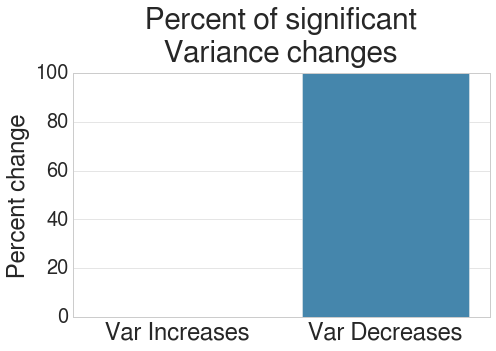

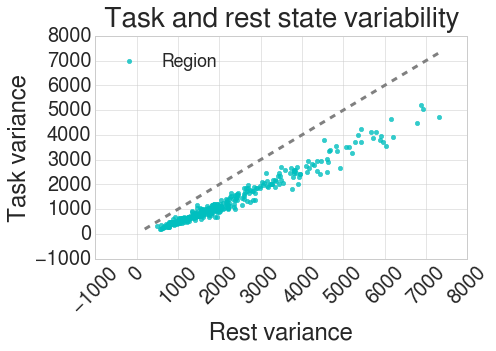

In [29]:
tmp = np.mean(np.mean(sddiff[:,:,:],axis=1),axis=1)
posSD = np.sum(np.multiply(tmp>0,qs_sd<0.05))/float(nParcels)*100
negSD = np.sum(np.multiply(tmp<0,qs_sd<0.05))/float(nParcels)*100


print '\tPercent of FC Increases:', posSD
print '\tNumber of FC Decreases:', negSD
print '\tPos-Neg Ratio =', posSD/negSD

plt.figure(figsize=(7,5))
sns.barplot(x=np.arange(2),y=[posSD,negSD])
plt.xticks(np.arange(2),['Var Increases', 'Var Decreases'],fontsize=24)
plt.ylabel('Percent change',fontsize=24)
plt.yticks(fontsize=20)
plt.title('Percent of significant\nVariance changes', y=1.03,fontsize=30)
plt.tight_layout()
# plt.savefig('fMRI2_NumberSDChanges_Exploratory.pdf')
# 


## Reviewer request - scatter plot of parcel-wise variance changes
triu_ind = np.triu_indices(nParcels,k=1)
plt.figure(figsize=(7,5))
df = {}
df['Rest'] = []
df['Task'] = []
df['Rest'].extend(np.mean(np.mean(restSD,axis=1),axis=1))
df['Task'].extend(np.mean(np.mean(taskSD,axis=1),axis=1))
df = pd.DataFrame(data=df)
sns.regplot(x="Rest",y="Task",data=df,fit_reg=False,label='Region',color='c')
minvar = np.min(np.mean(np.mean(taskSD,axis=1),axis=1))
maxvar = np.max(np.mean(np.mean(restSD,axis=1),axis=1))
plt.plot(np.arange(minvar,maxvar,1),np.arange(minvar,maxvar,1),color='grey',linestyle='--',linewidth=3)
plt.title('Task and rest state variability',fontsize=28, y=1.02)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('Task variance', fontsize=24)
plt.xlabel('Rest variance', fontsize=24)
plt.legend(loc=2, prop={'size': 18})
plt.tight_layout()
plt.savefig('fMRI2_TaskRestVar_Change_Scatter.jpg',dpi=300)

# Correlate if regions with more evoked activity are associated with more decreases in FC/variability (at group-level)

## Correlate task activity with SD reduction across regions
##### This is a replication of He et al. (2013)

SpearmanrResult(correlation=0.07251573443210724, pvalue=0.16977959703554676)
Variance Reduction: -877.0531419952821
Activity-level: 0.8262476478971278


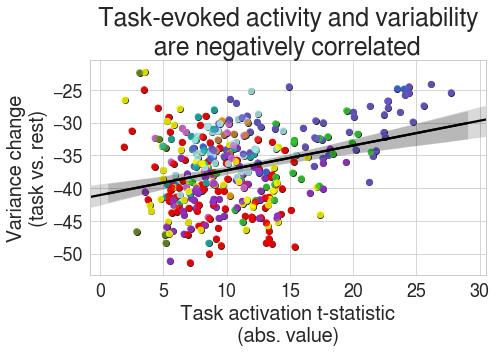

In [19]:
tmp_sddiff = np.zeros((360,2))
tmp_act = np.zeros((360,2))
for roi in range(360):
    tmp = np.mean(taskSD[roi,:,:],axis=0) - np.mean(restSD[roi,:,:],axis=0)
#     tmp = stats.ttest_rel(taskSD[roi,:,:], restSD[roi,:,:],axis=1)[0]
    t, p = stats.ttest_1samp(tmp,0)
    tmp_sddiff[roi,0] = np.mean(tmp)
    tmp_sddiff[roi,1] = t
    
    t = np.mean(np.abs(stats.ttest_1samp(taskActivity[roi,:,:],0,axis=1)[0]))
    tmp_act[roi,0] = np.mean(taskActivity[roi,:,:])
    tmp_act[roi,1] = t

print stats.spearmanr(tmp_sddiff[:,0],tmp_act[:,1])
print 'Variance Reduction:', np.mean(tmp_sddiff[:,0],axis=0)
print 'Activity-level:', np.mean(tmp_act[:,0],axis=0)

networkpalette = ['royalblue','slateblue','paleturquoise','darkorchid','limegreen',
                  'lightseagreen','yellow','orchid','r','peru','orange','olivedrab']
networkpalette = np.asarray(networkpalette)
tmp = {}
netcount = 0
for network in orderednetworks:
    net = np.where(networkdef==networkmappings[network])[0]
    for roi in net:
        tmp[roi] = networkpalette[netcount]
    netcount += 1

roiColorsByNetwork = []
for roi in range(len(networkdef)):
    roiColorsByNetwork.append(tmp[roi])
    

plt.figure(figsize=(7,5))
sns.regplot(tmp_act[:,1],tmp_sddiff[:,1],color='k')
sns.regplot(tmp_act[:,1],tmp_sddiff[:,1],color='k',scatter_kws={'color':roiColorsByNetwork})
plt.xlabel('Task activation t-statistic\n(abs. value)',fontsize=20)
plt.ylabel('Variance change\n(task vs. rest)',fontsize=20)
plt.title('Task-evoked activity and variability\nare negatively correlated',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('fMRI2_ActivityXSD_RegionalCorrelation_Exploratory.pdf')

# Covariance

SpearmanrResult(correlation=-0.3076101410247507, pvalue=2.501596049260125e-09)
FC Reduction: -192.96051411077858
Activity-level: 0.8262476478971278


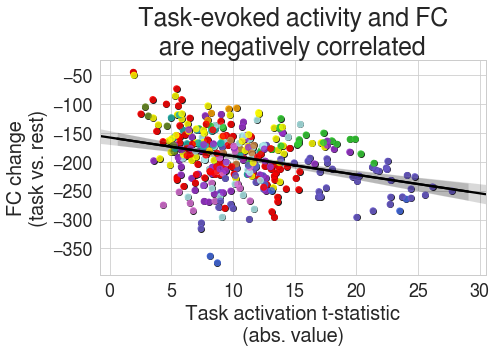

In [20]:
tmp_fcdiff = np.zeros((360,2))
tmp_act = np.zeros((360,2))
for roi in range(360):
    tmp = np.mean(np.mean(taskFC[roi,:,:,:],axis=1),axis=0) - np.mean(np.mean(restFC[roi,:,:,:],axis=1),axis=0)
#     tmp = stats.ttest_1samp(taskGeneralFC[roi,:,:],0,axis=0)[0] - stats.ttest_1samp(restGeneralFC[roi,:,:],0,axis=0)[0]
#     tmp = stats.ttest_rel(tmp[roi,:,:],0-,axis=0)[0] 
    
    t, p = stats.ttest_1samp(tmp,0)
    tmp_fcdiff[roi,0] = np.mean(tmp)
    tmp_fcdiff[roi,1] = t
    
    t = np.mean(np.abs(stats.ttest_1samp(taskActivity[roi,:,:],0,axis=1)[0]))
    tmp_act[roi,0] = np.mean(taskActivity[roi,:,:])
    tmp_act[roi,1] = t
    
print stats.spearmanr(tmp_fcdiff[:,0],tmp_act[:,1])
print 'FC Reduction:', np.mean(tmp_fcdiff[:,0],axis=0)
print 'Activity-level:', np.mean(tmp_act[:,0],axis=0)

plt.figure(figsize=(7,5))
sns.regplot(tmp_act[:,1],tmp_fcdiff[:,0],color='k')
sns.regplot(tmp_act[:,1],tmp_fcdiff[:,0],color='k',scatter_kws={'color':roiColorsByNetwork})
plt.xlabel('Task activation t-statistic\n(abs. value)',fontsize=20)
plt.ylabel('FC change\n(task vs. rest)',fontsize=20)
plt.title('Task-evoked activity and FC\nare negatively correlated',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('fMRI2_ActivityXFC_RegionalCorrelation_Exploratory.pdf')

___


### SD by task

In [21]:
taskcount = 0
for task in taskNames:
    task_ind = tasks[task]
    tmp_sddiff = np.zeros((360,2))
    tmp_act = np.zeros((360,2))
    for roi in range(360):
        tmp = taskSD[roi,taskcount,:] - restSD[roi,taskcount,:]
        t, p = stats.ttest_1samp(tmp,0)
        tmp_sddiff[roi,0] = np.mean(tmp)
        tmp_sddiff[roi,1] = t

        t = np.mean(np.abs(stats.ttest_1samp(taskActivity[roi,task_ind,:],0,axis=1)[0]))
        tmp_act[roi,0] = np.mean(taskActivity[roi,task_ind,:])
        tmp_act[roi,1] = t

    print 'Task:', task
    print stats.spearmanr(tmp_sddiff[:,0],tmp_act[:,1])
    print 'SD Reduction:', np.mean(tmp_sddiff[:,0],axis=0)
    print 'Activity-level:', np.mean(tmp_act[:,0],axis=0)
    taskcount += 1

Task: EMOTION
SpearmanrResult(correlation=0.14723596118282806, pvalue=0.005123552892529261)
SD Reduction: -972.2760771187048
Activity-level: 0.7306492958897097
Task: GAMBLING
SpearmanrResult(correlation=-0.016558255336332327, pvalue=0.754204951029382)
SD Reduction: -1029.376032940066
Activity-level: 1.145238738504924
Task: LANGUAGE
SpearmanrResult(correlation=-0.38154718272003124, pvalue=6.39253903698567e-14)
SD Reduction: -845.0799412378666
Activity-level: -4.852304112433688
Task: MOTOR
SpearmanrResult(correlation=0.11979953549024296, pvalue=0.023006650095793595)
SD Reduction: -662.0725887613579
Activity-level: -0.15809404083148143
Task: RELATIONAL
SpearmanrResult(correlation=-0.018199728907373255, pvalue=0.7307386328552685)
SD Reduction: -1205.6360501069662
Activity-level: 1.929781493787672
Task: SOCIAL
SpearmanrResult(correlation=0.31257314228247646, pvalue=1.3393322675439708e-09)
SD Reduction: -955.0311685475691
Activity-level: 3.9754865517624465
Task: WM
SpearmanrResult(correlatio

### Correlation by task

In [22]:
taskcount = 0
for task in taskNames:
    task_ind = tasks[task]
    tmp_fcdiff = np.zeros((360,2))
    tmp_act = np.zeros((360,2))
    for roi in range(360):
        tmp = np.mean(taskFC[roi,:,taskcount,:],axis=0) - np.mean(restFC[roi,:,taskcount,:],axis=0)
        t, p = stats.ttest_1samp(tmp,0)
        tmp_fcdiff[roi,0] = np.mean(tmp)
        tmp_fcdiff[roi,1] = t

        t = np.mean(np.abs(stats.ttest_1samp(taskActivity[roi,task_ind,:],0,axis=1)[0]))
        tmp_act[roi,0] = np.mean(taskActivity[roi,task_ind,:])
        tmp_act[roi,1] = t

    print 'Task:', task
    print stats.spearmanr(tmp_fcdiff[:,0],tmp_act[:,1])
    print 'FC Reduction:', np.mean(tmp_fcdiff[:,0],axis=0)
    print 'Activity-level:', np.mean(tmp_act[:,0],axis=0)
    taskcount += 1

Task: EMOTION
SpearmanrResult(correlation=-0.1585485484713102, pvalue=0.002553825549249615)
FC Reduction: -169.36283589151404
Activity-level: 0.7306492958897097
Task: GAMBLING
SpearmanrResult(correlation=-0.27571406157969325, pvalue=1.057756036390229e-07)
FC Reduction: -211.47388300112942
Activity-level: 1.145238738504924
Task: LANGUAGE
SpearmanrResult(correlation=-0.17072559716252952, pvalue=0.0011462371729122783)
FC Reduction: -204.17169184852366
Activity-level: -4.852304112433688
Task: MOTOR
SpearmanrResult(correlation=-0.1703637116541537, pvalue=0.001174771996404893)
FC Reduction: -136.61128839056553
Activity-level: -0.15809404083148143
Task: RELATIONAL
SpearmanrResult(correlation=-0.20604685735743847, pvalue=8.209276924799432e-05)
FC Reduction: -293.80189269119273
Activity-level: 1.929781493787672
Task: SOCIAL
SpearmanrResult(correlation=0.05494486840176235, pvalue=0.2984953266396987)
FC Reduction: -224.75986253905285
Activity-level: 3.9754865517624465
Task: WM
SpearmanrResult(cor